<a href="https://colab.research.google.com/github/Emojirakin/Graet-Learning-/blob/main/Shinkansen_Train_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from scipy.stats import chisquare

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [57]:
travel_train = pd.read_csv("Traveldata_train.csv")
survey_train = pd.read_csv("Surveydata_train.csv")
travel_test = pd.read_csv("Traveldata_test.csv")
survey_test = pd.read_csv("Surveydata_test.csv")

In [58]:

travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [59]:
l=[travel_train, survey_train]

To see the dataframe


In [60]:
for i in l:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID              

From the data it can be seen that there are missing data.

In [61]:
#Checking the unique values from the dataset
for i in l:
    print(i.nunique())

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64


In [62]:
#Merging the Training Data
df_train = pd.merge(travel_train, survey_train, how = 'left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

In [63]:
#Merging the Test data
df_test = pd.merge(travel_test,survey_test, how = 'left', on ='ID')
df_test = df_test.set_index('ID')
df_test.shape

(35602, 23)

In [64]:
df_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [65]:
#Checking the merged train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi

In [66]:
#Checking the merged test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 99900001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35572 non-null  object 
 1   Customer_Type            32219 non-null  object 
 2   Age                      35591 non-null  float64
 3   Type_Travel              32154 non-null  object 
 4   Travel_Class             35602 non-null  object 
 5   Travel_Distance          35602 non-null  int64  
 6   Departure_Delay_in_Mins  35573 non-null  float64
 7   Arrival_Delay_in_Mins    35479 non-null  float64
 8   Seat_Comfort             35580 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_Time_Convenient  32277 non-null  object 
 11  Catering                 32245 non-null  object 
 12  Platform_Location        35590 non-null  object 
 13  Onboard_Wifi_Service     35590 non-null  object 
 14  Onboard_Ente

In [67]:
df_train.describe()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,39.419647,1978.888185,14.647092,15.005222,0.546658
std,15.116632,1027.961019,38.138781,38.439409,0.497821
min,7.000000,50.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,51.000000,2538.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [68]:
df_test.describe()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,35591.000000,35602.000000,35573.000000,35479.000000
mean,39.446995,1987.151761,14.880696,15.308802
std,15.137554,1024.308863,37.895453,38.531293
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1360.000000,0.000000,0.000000
50%,40.000000,1929.000000,0.000000,0.000000
75%,51.000000,2559.000000,13.000000,13.000000
max,85.000000,6868.000000,978.000000,970.000000


PERFORMING EXPLORATION DATA ANALYSIS ON DATAFRAME

In [69]:
#Remove Missing Rows from Columns with few number of Missing Values
#Delete Rows with Missing Values from the columns
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'Departure_Delay_in_Mins',
                                               'Arrival_Delay_in_Mins', 'Seat_Comfort', 'Platform_Location',
                                               'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                                               'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
                                               'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])

In [70]:
target = ['Overall_Experience']

In [71]:
#Identifying numerical columns and creating a list of them
num_col = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [72]:
#An overview of all columns in df_train
all_col = list(df_train.columns)
all_col

['Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [73]:
#creating a list of catergorical columns from all columns
cat_col = [x for x in all_col if x not in num_col]
cat_col = [x for x in cat_col if x not in target]
cat_col

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

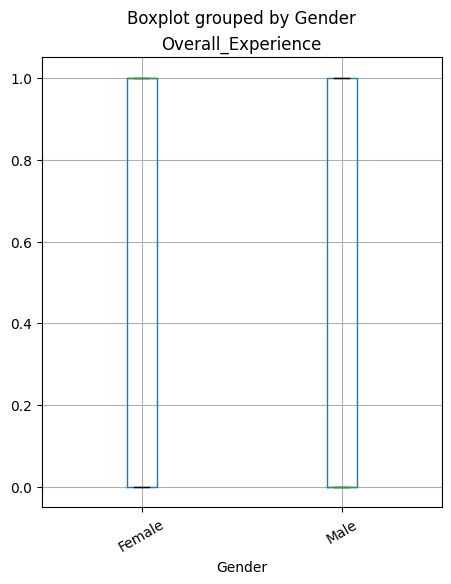

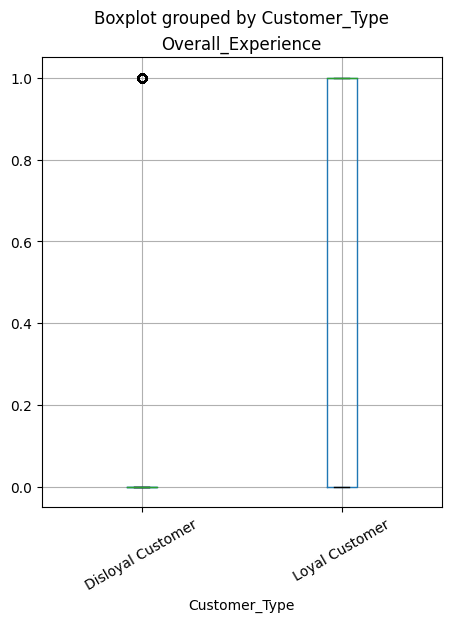

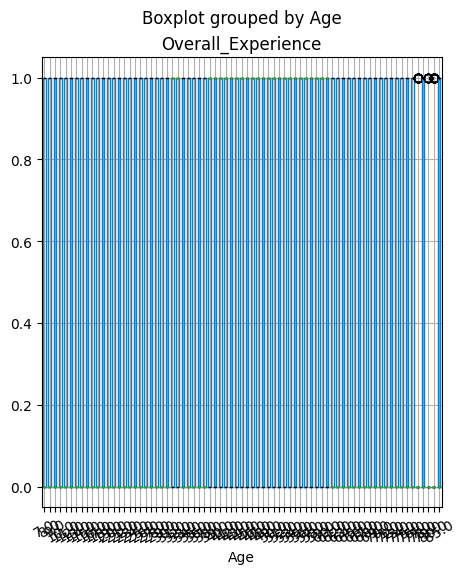

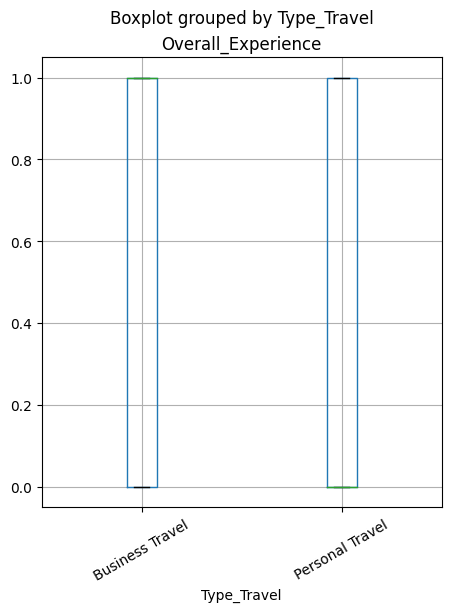

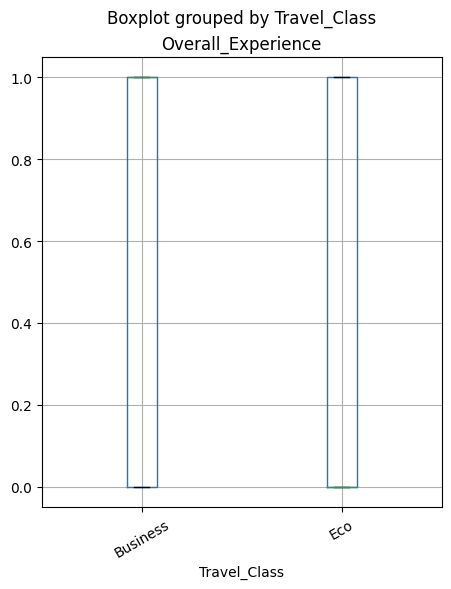

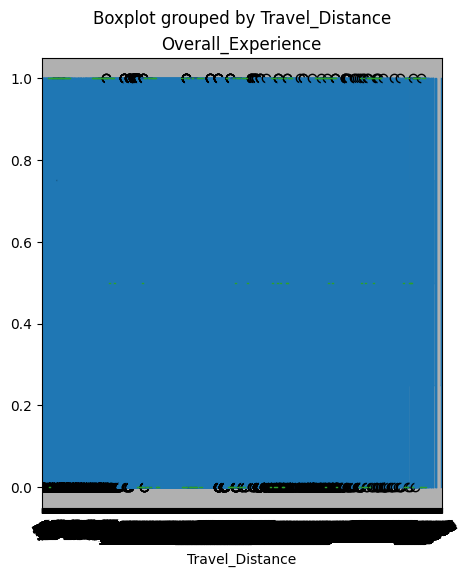

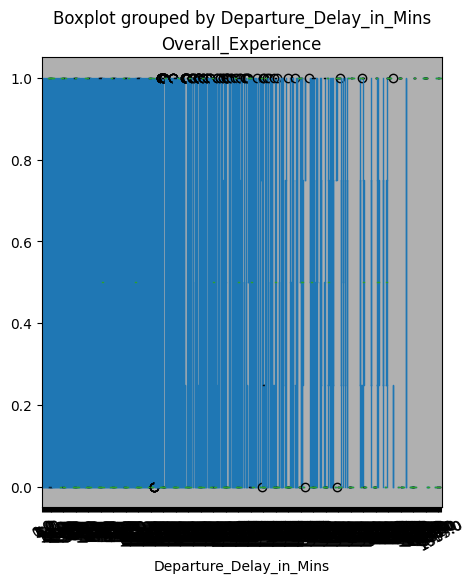

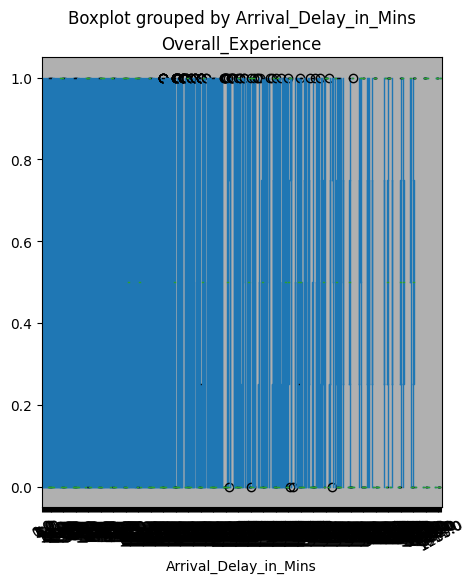

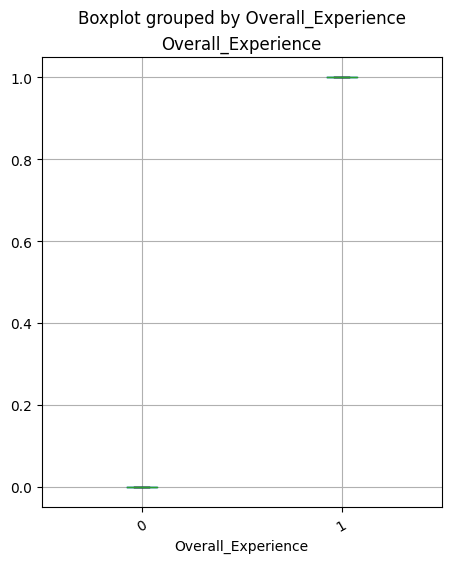

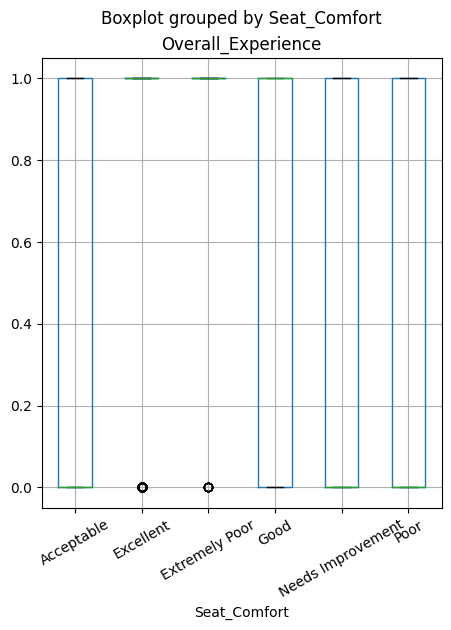

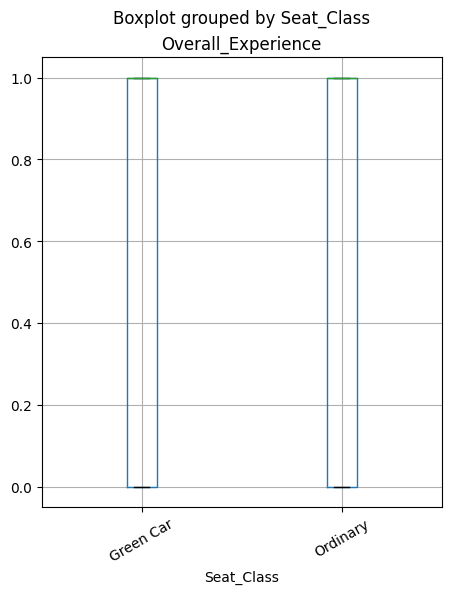

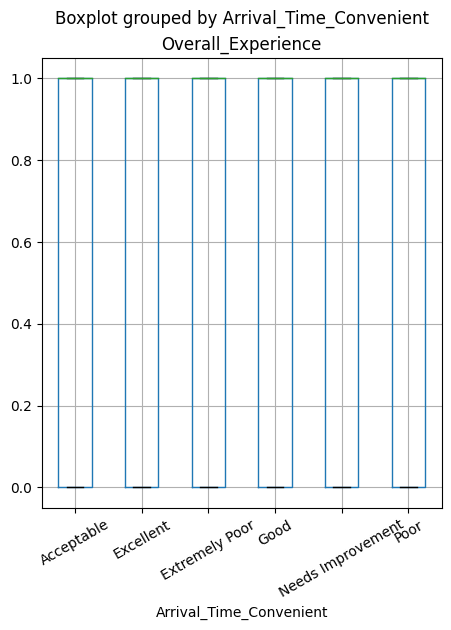

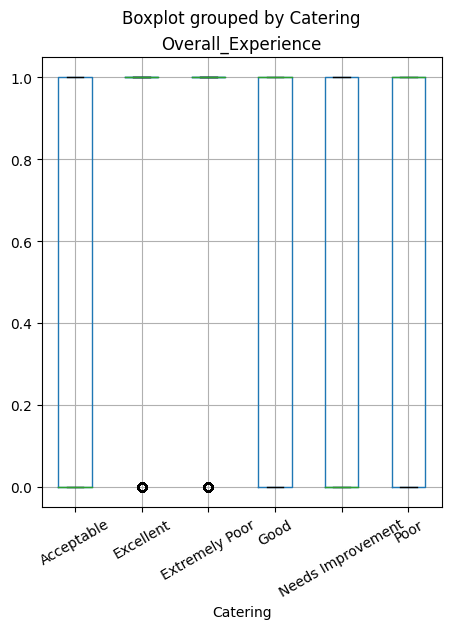

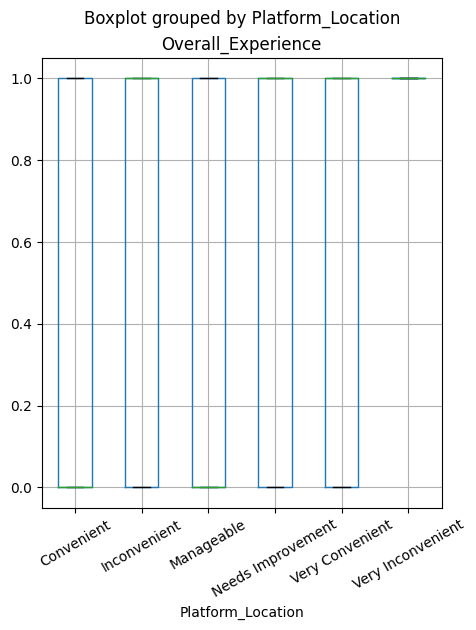

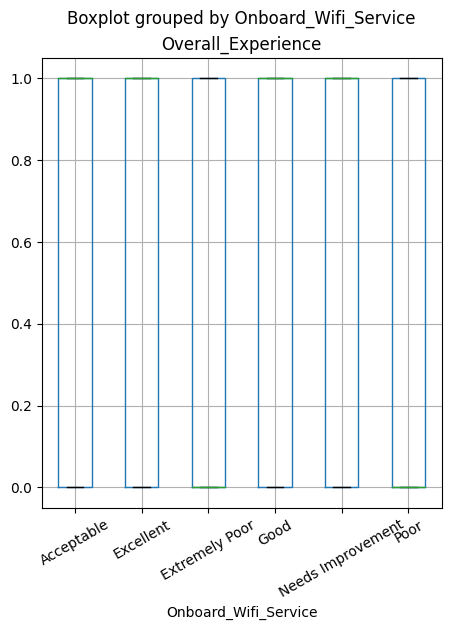

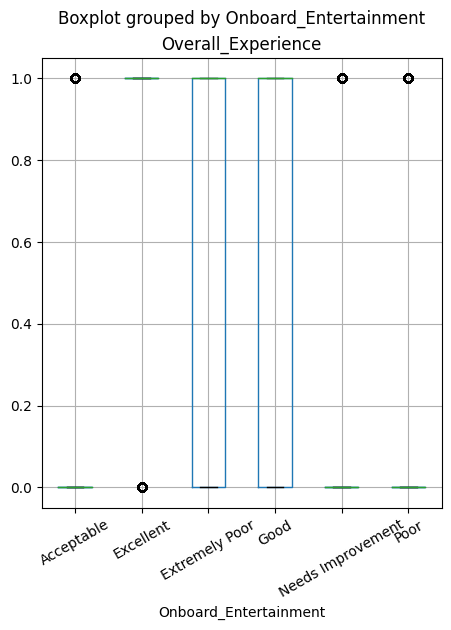

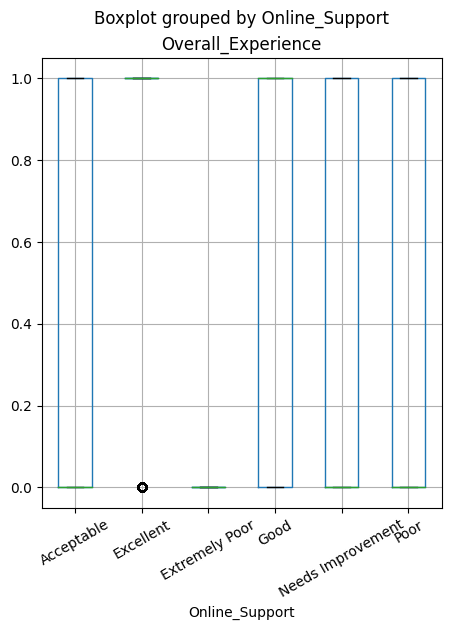

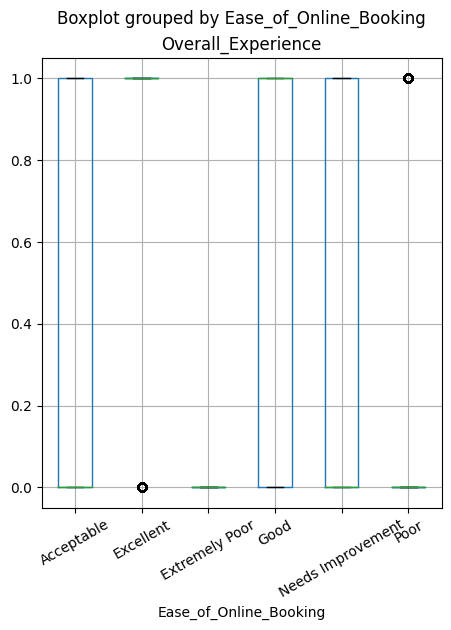

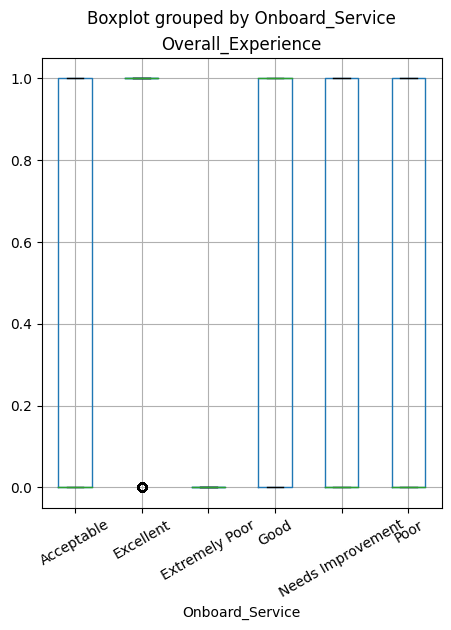

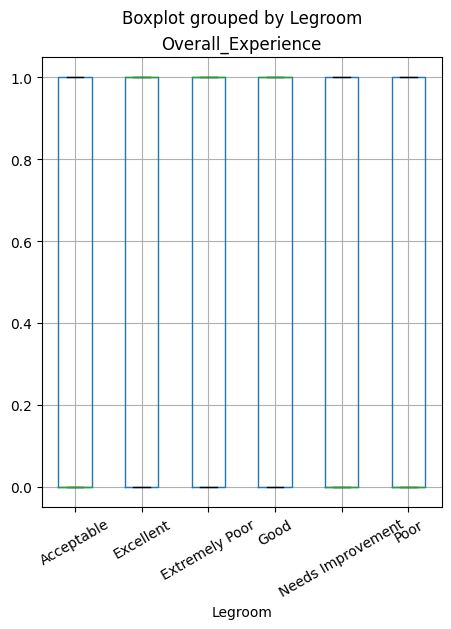

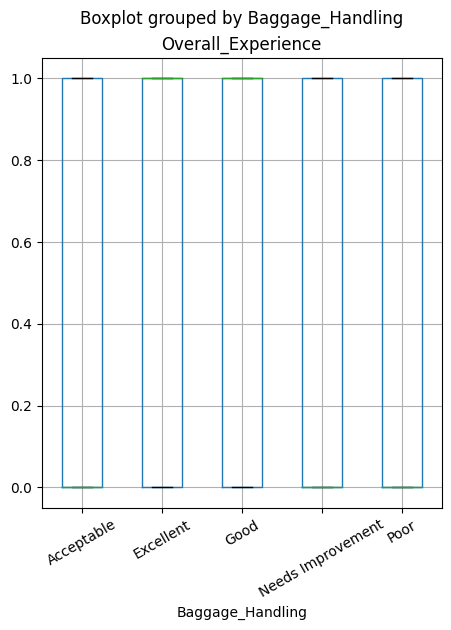

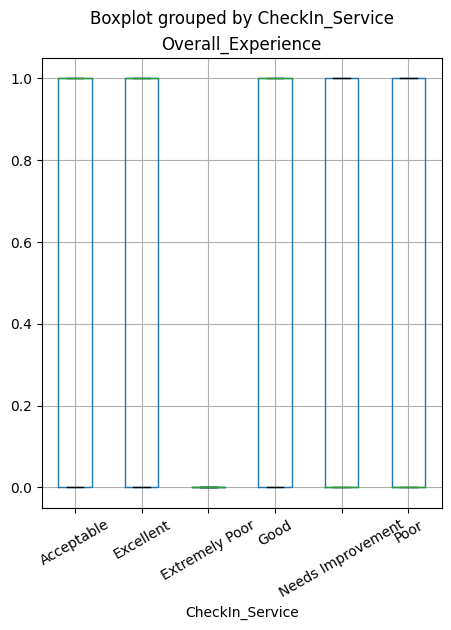

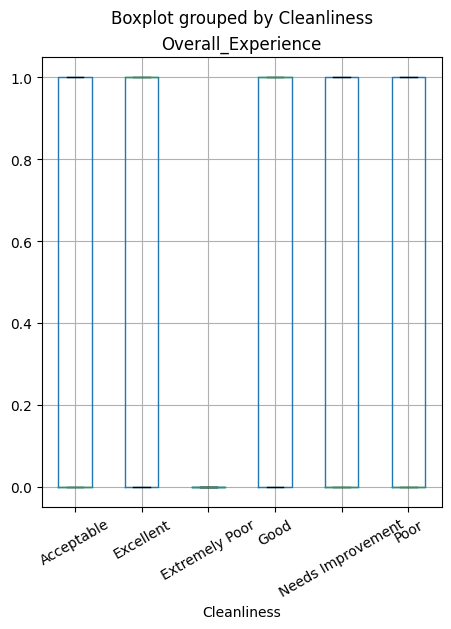

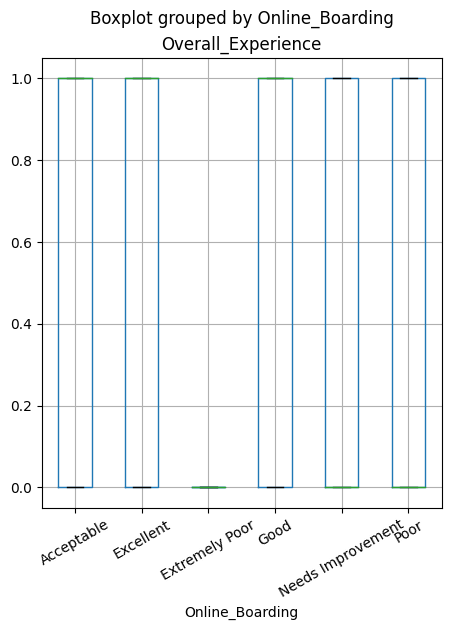

In [74]:
for i in all_col:
    df_train.boxplot('Overall_Experience', i ,rot = 30,figsize=(5,6))

Age
Skew : -0.0


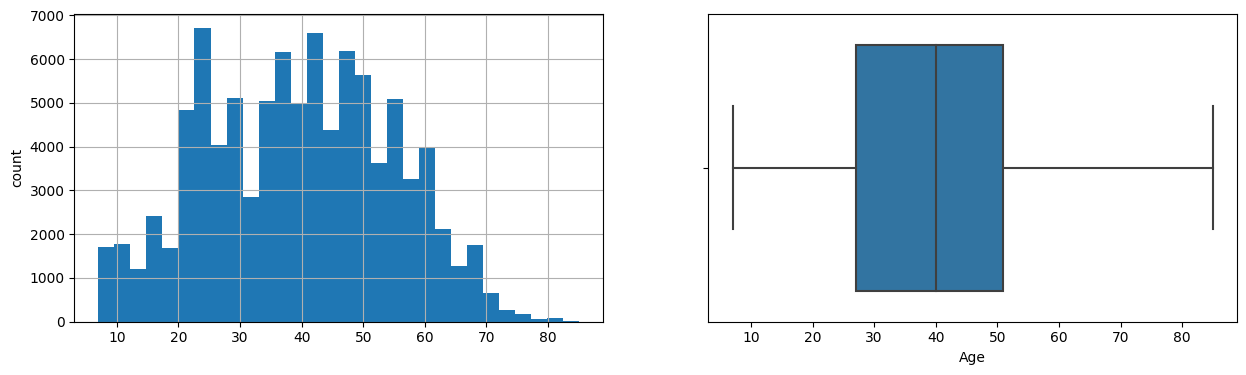

Travel_Distance
Skew : 0.47


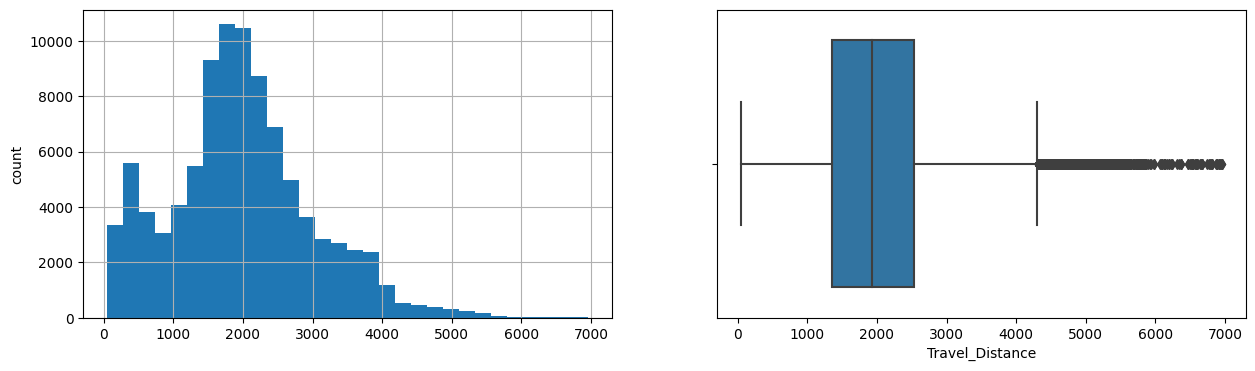

Departure_Delay_in_Mins
Skew : 6.43


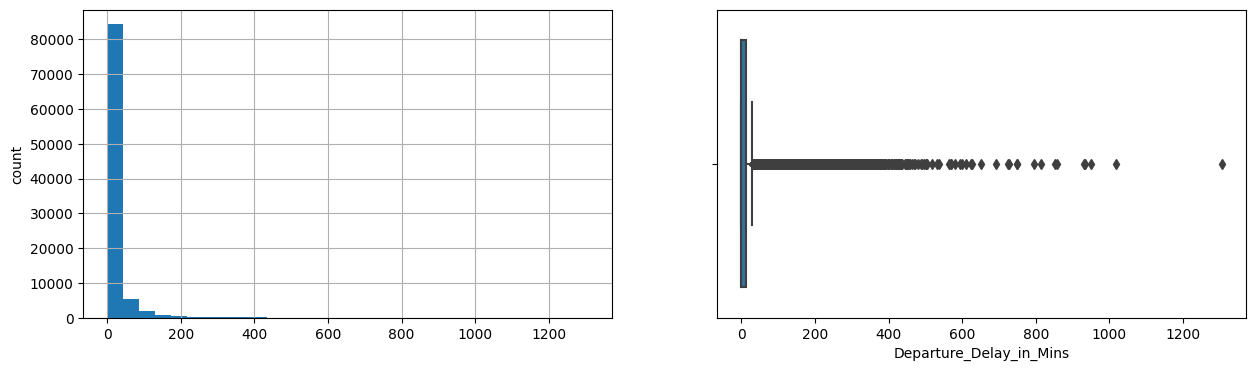

Arrival_Delay_in_Mins
Skew : 6.26


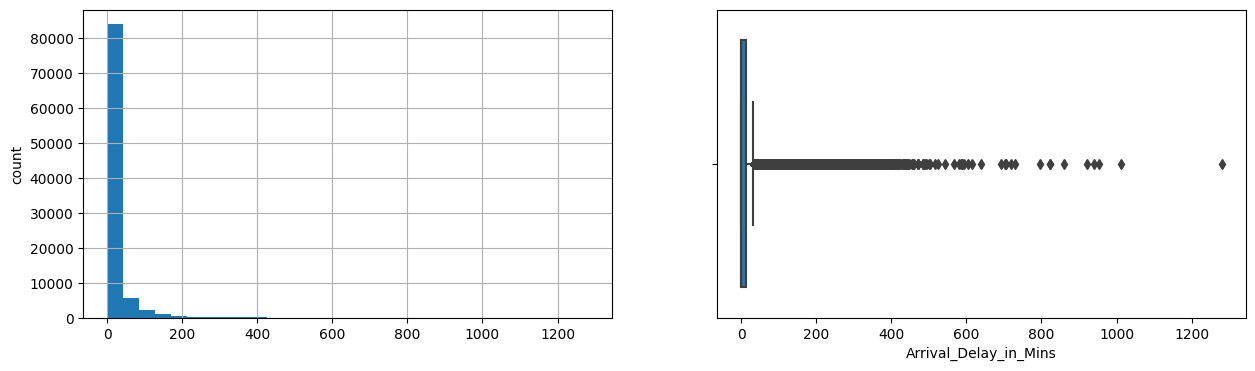

In [75]:
#checking the distribution of the data
data = df_train

for col in num_col: 
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = data)
    plt.show()

Preprocessing the Dataset

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93695 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   93695 non-null  object 
 1   Customer_Type            84875 non-null  object 
 2   Age                      93695 non-null  float64
 3   Type_Travel              84562 non-null  object 
 4   Travel_Class             93695 non-null  object 
 5   Travel_Distance          93695 non-null  int64  
 6   Departure_Delay_in_Mins  93695 non-null  float64
 7   Arrival_Delay_in_Mins    93695 non-null  float64
 8   Overall_Experience       93695 non-null  int64  
 9   Seat_Comfort             93695 non-null  object 
 10  Seat_Class               93695 non-null  object 
 11  Arrival_Time_Convenient  84909 non-null  object 
 12  Catering                 85034 non-null  object 
 13  Platform_Location        93695 non-null  object 
 14  Onboard_Wifi

In [77]:
#Removing the Outliers
print(df_train.shape)

from numpy import mean
from numpy import std

for i in num_col:
    print("i==",i)
    data = df_train[i]
    data_mean, data_std = mean(data), std(data)
    print("Mean, Std:",data_mean, data_std)
  
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print("Lower, Upper:", lower, upper)
    
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    
    df_train.drop(df_train[df_train[i] >= upper].index, inplace = True)
    
print(df_train.shape)

(93695, 24)
i== Age
Mean, Std: 39.41773840653183 15.11639446067316
Lower, Upper: -5.9314449754876435 84.76692178855131
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.4658133800185 1027.7808095109901
Lower, Upper: -1104.8766151529517 5061.808241912989
Identified outliers: 617
i== Departure_Delay_in_Mins
Mean, Std: 14.296174511068129 36.70645910020037
Lower, Upper: -95.82320278953298 124.41555181166925
Identified outliers: 1948
i== Arrival_Delay_in_Mins
Mean, Std: 10.786449644393713 21.851272099260086
Lower, Upper: -54.767366653386546 76.34026594217397
Identified outliers: 2720
(88392, 24)


In [78]:
#Put together df_train and df_test to transform them together
y = df_train[target]
df_train = df_train.drop(["Overall_Experience"], axis=1)

In [79]:
Com_train = df_train.index
Com_test = df_test.index

df = pd.concat([df_train,df_test], axis=0)
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,Needs Improvement,Green Car,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,Poor,Ordinary,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,Acceptable,Ordinary,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,Acceptable,Ordinary,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
98800006,Male,Loyal Customer,44.0,Business Travel,Business,2810,0.0,0.0,Needs Improvement,Ordinary,...,Good,Excellent,Good,Acceptable,Acceptable,Good,Acceptable,Acceptable,Acceptable,Acceptable


In [80]:
#Since Departure - Arrival columns are mostly correlated then I will include missing values
df.Departure_Delay_in_Mins.fillna(df.Arrival_Delay_in_Mins, inplace=True)
df.Arrival_Delay_in_Mins.fillna(df.Departure_Delay_in_Mins, inplace=True)

In [81]:
#Categorical Values into Dataframe
df = df.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], 
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df = df.replace(['Business Travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], 
           [6, 5, 4, 3, 2, 1])

In [82]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.0,52.0,NaN,1,272,0.0,5.0,3.0,1,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.0,48.0,0.0,0,2200,9.0,0.0,2.0,0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.0,44.0,1.0,1,780,13.0,18.0,4.0,0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.0,50.0,1.0,1,1981,0.0,0.0,4.0,0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.0,44.0,1.0,1,2810,0.0,0.0,3.0,0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123994 entries, 98800001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   123964 non-null  float64
 1   Customer_Type            112293 non-null  float64
 2   Age                      123983 non-null  float64
 3   Type_Travel              111888 non-null  float64
 4   Travel_Class             123994 non-null  int64  
 5   Travel_Distance          123994 non-null  int64  
 6   Departure_Delay_in_Mins  123965 non-null  float64
 7   Arrival_Delay_in_Mins    123965 non-null  float64
 8   Seat_Comfort             123972 non-null  float64
 9   Seat_Class               123994 non-null  int64  
 10  Arrival_Time_Convenient  112383 non-null  float64
 11  Catering                 112443 non-null  float64
 12  Platform_Location        123982 non-null  float64
 13  Onboard_Wifi_Service     123982 non-null  float64


In [84]:
#Identifying missing values in df
df_travs = df
missing_columns = [col for col in df_travs.columns if df_travs[col].isnull().any()]
missig_values_count = df_travs.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df_travs)
missing_Values_df.style.background_gradient(cmap='Pastel1')


,Null Values Count,Share of Missing Values
Gender,30,0.000242
Customer_Type,11701,0.094367
Age,11,0.000089
Type_Travel,12106,0.097634
Departure_Delay_in_Mins,29,0.000234
Arrival_Delay_in_Mins,29,0.000234
Seat_Comfort,22,0.000177
Arrival_Time_Convenient,11611,0.093642
Catering,11551,0.093158
Platform_Location,12,0.000097


In [85]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.0    0.507518
1.0    0.492482
Name: Gender, dtype: float64
****************************************
1.0    0.817166
0.0    0.182834
Name: Customer_Type, dtype: float64
****************************************
39.0    0.028512
25.0    0.026826
40.0    0.024858
44.0    0.023923
41.0    0.023907
          ...   
76.0    0.000476
74.0    0.000444
79.0    0.000395
78.0    0.000339
85.0    0.000056
Name: Age, Length: 75, dtype: float64
****************************************
1.0    0.688689
0.0    0.311311
Name: Type_Travel, dtype: float64
****************************************
0    0.522445
1    0.477555
Name: Travel_Class, dtype: float64
****************************************
1963    0.000710
1812    0.000694
1789    0.000669
1639    0.000661
1748    0.000661
          ...   
4613    0.000008
4714    0.000008
4359    0.000008
4759    0.000008
5090    0.000008
Name: Travel_Distance, Length: 5056, dtype: float64
****************************************
0.0      0.587190
1.0      0.029

In [86]:
#Using K Nearest Neighbours
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)
arr = imputer.transform(df)

In [87]:
df = pd.DataFrame(arr, columns = df.columns, index = df.index)

In [88]:
df

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.000000,52.0,0.333333,1.0,272.0,0.0,5.0,3.0,1.0,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.000000,48.0,0.000000,0.0,2200.0,9.0,0.0,2.0,0.0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.000000,44.0,1.000000,1.0,780.0,13.0,18.0,4.0,0.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.000000,50.0,1.000000,1.0,1981.0,0.0,0.0,4.0,0.0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.000000,44.0,1.000000,1.0,2810.0,0.0,0.0,3.0,0.0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1.0,1.000000,8.0,0.000000,0.0,1334.0,0.0,0.0,3.0,1.0,...,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0
99935599,0.0,1.000000,53.0,1.000000,1.0,1772.0,0.0,0.0,3.0,0.0,...,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
99935600,1.0,0.000000,22.0,1.000000,0.0,1180.0,0.0,0.0,5.0,1.0,...,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0


In [89]:
df_travs = df
missing_columns = [col for col in df_travs.columns if df_travs[col].isnull().any()]
missig_values_count = df_travs.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df_travs)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values


In [90]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #To get the % of each category set the normalize=True
    print('*'*40) 

0.000000    0.507428
1.000000    0.492395
0.333333    0.000105
0.666667    0.000073
Name: Gender, dtype: float64
****************************************
1.000000    0.799329
0.000000    0.168968
0.666667    0.020977
0.333333    0.010726
Name: Customer_Type, dtype: float64
****************************************
39.000000    0.028509
25.000000    0.026832
40.000000    0.024856
44.000000    0.023929
41.000000    0.023904
               ...   
39.333333    0.000008
20.333333    0.000008
47.333333    0.000008
51.333333    0.000008
40.666667    0.000008
Name: Age, Length: 81, dtype: float64
****************************************
1.000000    0.662193
0.000000    0.287361
0.666667    0.033744
0.333333    0.016702
Name: Type_Travel, dtype: float64
****************************************
0.0    0.522445
1.0    0.477555
Name: Travel_Class, dtype: float64
****************************************
1963.0    0.000710
1812.0    0.000694
1789.0    0.000669
1639.0    0.000661
1748.0    0.000661
  

In [91]:
df = df.round(decimals = 0)
df = df.astype(int)

In [92]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,0,5,3,1,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,9,0,2,0,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,13,18,4,0,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,0,4,0,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,0,3,0,...,5,6,5,4,4,5,4,4,4,4


<Axes: >

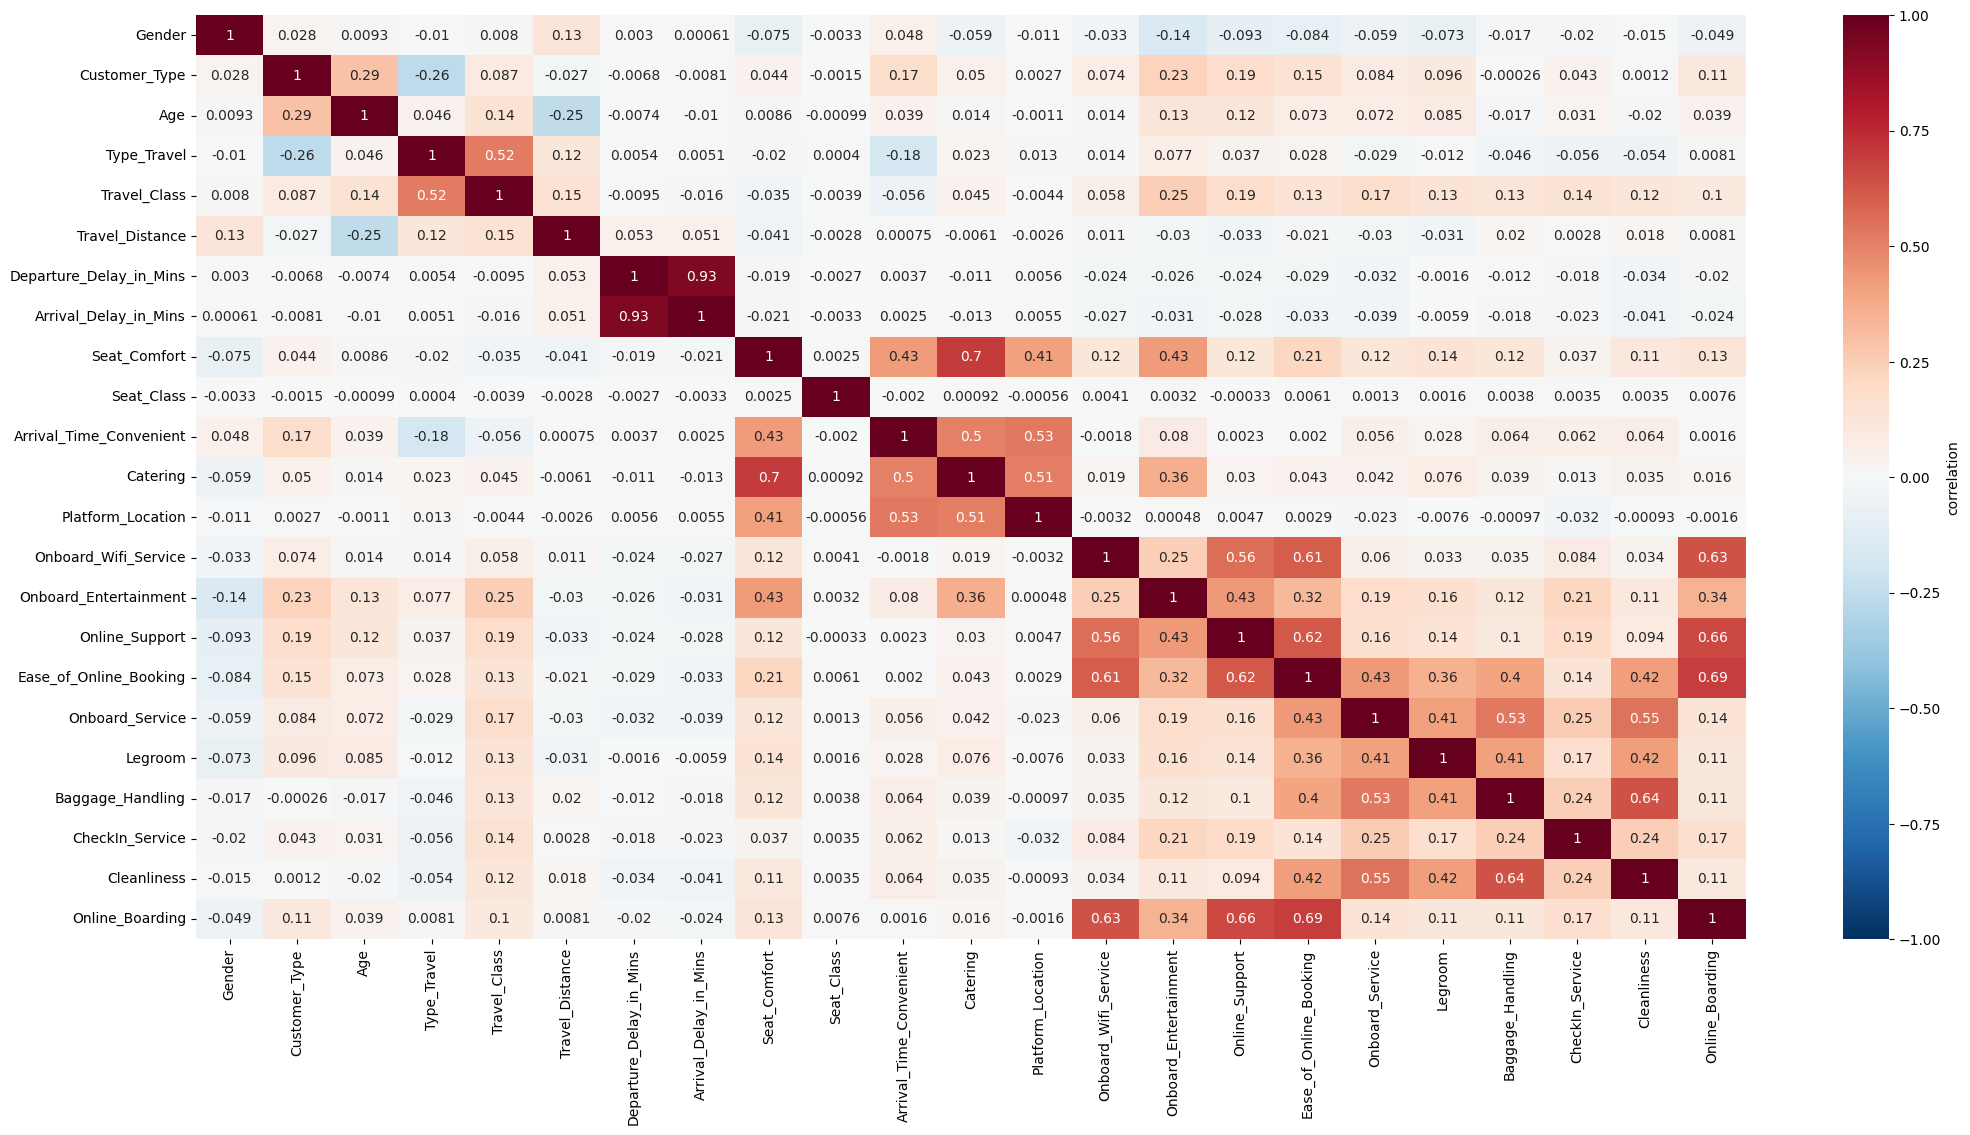

In [93]:
#Correlation for numerical_columns by plotting heatmap
df_corr = df.corr()


fig, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', 
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax) 

In [94]:
#Going back to df_train and df_test
X = df.loc[Com_train]
X_test = df.loc[Com_test]

Cross Validation Model Using Random Forest

In [95]:
y=y.astype('int')

# summarize the dataset
print(X.shape, y.shape)
print(type(X),type(y))

(88392, 23) (88392, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [96]:
#Identifying and evaluating the model

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rand_forest_classifier_cv = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.951 (0.002)


In [97]:
# fit the model on the whole dataset
rand_forest_classifier_cv.fit(X, y)

RandomForestClassifier()

In [98]:
X_test.shape

(35602, 23)

In [99]:
model = rand_forest_classifier_cv

In [100]:
sub = pd.DataFrame(X_test)

res = model.predict(X_test)

sub["Overall_Experience"] = res #res = model.predict(df_test)
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("rf_cl_cv_Day2_feature_eng.csv", index = True)
sub_to_file

,Overall_Experience
ID,
99900001,1
99900002,1
99900003,1
99900004,0
99900005,1
...,...
99935598,0
99935599,1
99935600,1


Using Random Forest model is the best model with a accuracy of 0.951.